In [1]:
%pylab inline
from scipy.sparse.linalg import eigs
from scipy.spatial.distance import squareform, pdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import struct

def read_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

def read_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# test_images = read_images('MNIST/train-images.idx3-ubyte')
# test_labels = read_labels('MNIST/train-labels.idx1-ubyte')
test_images = read_images('MNIST/t10k-images.idx3-ubyte')
test_labels = read_labels('MNIST/t10k-labels.idx1-ubyte')
datas = [list(row.flatten()) for row in test_images]
N = test_images.shape[0]

In [3]:
# Compute K, P, D matrices

def get_K0(data):
    Dis=squareform(pdist(data))
    Dis_sort = sort(Dis,1)    # distance of one point to another arrange in descending power
    Dis=Dis*Dis
    
    Sigma=diag(1/Dis_sort[:,s+1])
    
    K=Sigma.dot(Dis).dot(Sigma)
    K=exp(-K)
    return K
    
def get_K(data, sigma):
    Dis = squareform(pdist(data))
    Dis = Dis * Dis

    Sigma = np.eye(N) / (sigma**2)

    K = Sigma.dot(Dis)
    K = exp(-K)
    return K

def get_DnQ(K):
    D=diag(1/sqrt(sum(K, axis=1)))
    Q=D.dot(K).dot(D)
    return D, Q

def get_D(P):
    Dis = squareform(pdist(P))
    return Dis * Dis

In [4]:
# K = get_K(datas, 2)
s = 10
K = get_K0(datas)
print('K done')
D, Q= get_DnQ(K)
print('Q done')

K done
Q done


In [5]:
qval, qvec = eigs(Q, 3)
print('get eigen')
U, S= D.dot(qvec), diag(qval)
print('get USV')
M = real(U.dot(S))
print('get coor')

get eigen
get USV
get coor


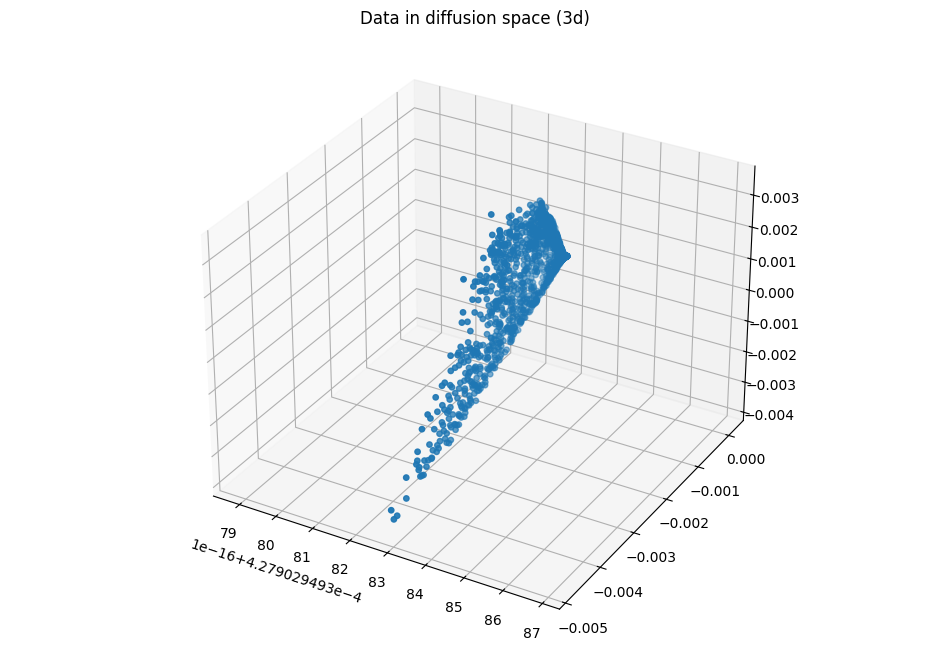

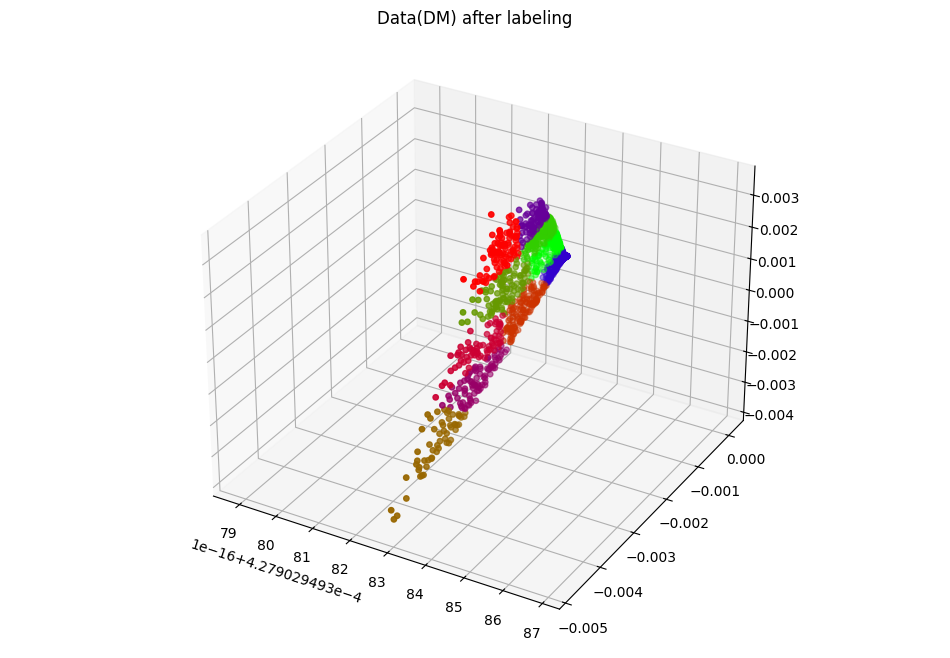

In [6]:
def get_labels(X):
    kmeans = KMeans(clusters)
    kmeans = kmeans.fit(X)
    labels = np.array(kmeans.predict(X)).reshape(N, 1)
    return labels

clusters = 10
SIZE = 15
x, y, z = M[:,0], M[:,1], M[:,2]
X = np.array(list(zip(x, y, z)))
labels = get_labels(X)

labels = get_labels(X)
cmap= cm.brg
norm = plt.Normalize(0, clusters)
colors = cmap(norm(labels+1))

# fig, ax = plt.subplots()
# ax.scatter(datas[:,0], datas[:,1], s=SIZE, color=colors)
# ax.set_title(f'Data in original space, N={N}')
# plt.show()

fig, ax = plt.subplots()

ax.set_axis_off()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M[:,0], M[:,1], M[:,2], s=SIZE)
ax.set_title('Data in diffusion space (3d)')
plt.gcf().set_size_inches(12,8)
plt.show

fig, ax = plt.subplots()
ax.set_axis_off()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M[:,0], M[:,1], M[:,2], s=SIZE, color=colors)
ax.set_title('Data(DM) after labeling')
plt.gcf().set_size_inches(12,8)
plt.show()

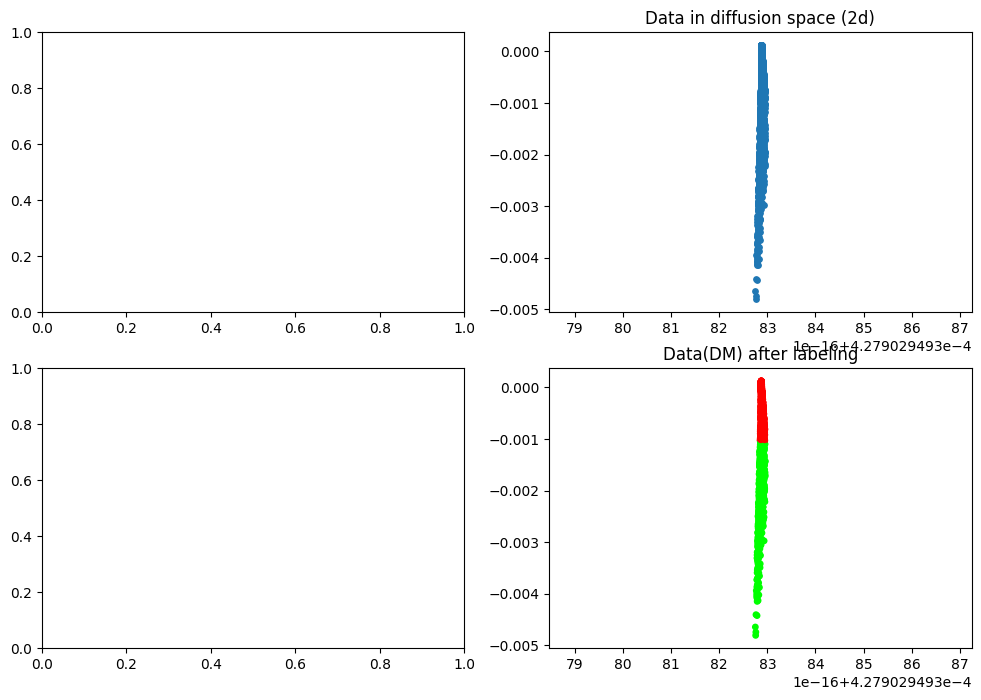

In [7]:
x, y = M[:,0], M[:,1]
X = np.array(list(zip(x, y)))
SIZE, cluster = 15, 2

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
# axs[0,0].scatter(datas[:,0], datas[:,1], s=SIZE)
# axs[0,0].set_title(f'Data in original space, N={N}')

axs[0,1].scatter(M[:,0], M[:,1], s=SIZE)
axs[0,1].set_title('Data in diffusion space (2d)') 

kmeans = KMeans(cluster)
kmeans = kmeans.fit(X)
labels = np.array(kmeans.predict(X)).reshape(N, 1)

cmap= cm.brg
norm = plt.Normalize(0, cluster)
colors = cmap(norm(labels+1))

# axs[1,0].scatter(datas[:,0], datas[:,1], s=SIZE, color=colors)
# axs[1,0].set_title('Data after labeling')

axs[1,1].scatter(M[:,0], M[:,1], s=SIZE, color=colors)
axs[1,1].set_title('Data(DM) after labeling')
plt.gcf().set_size_inches(12,8)
plt.savefig('spiral2_large.png')
plt.show()

In [ ]:
# Read datas

unarr_datas = []
with open('datas/spiral2_large.txt', 'r') as in_file:
    raw_datas = in_file.readlines()
    for line in raw_datas:
        points = list(map(float, line.split()))
        unarr_datas.append(np.array([points[1], points[2]]))

datas = np.array(unarr_datas)
N = len(datas)

plt.scatter(datas[:, 0], datas[:, 1], marker='.')
plt.show